This dataset contains information on internet access around the world.

The workspace is set up with two CSV files containing information on global internet access for years ranging from 1990 to 2020.

- `internet_users.csv`
    - `users` - The number of people who have used the internet in the last three months
    - `share` - The share of the entity's population who have used the internet in the last three months
- `adoption.csv`
    - `fixed_telephone_subs` - The number of people who have a telephone landline connection
    - `fixed_telephone_subs_share` - The share of the entity's population who have a telephone landline connection
    - `fixed_broadband_subs` - The number of people who have a broadband internet landline connection
    - `fixed_broadband_subs_share` - The share of the entity's population who have a broadband internet landline connection
    - `mobile_cell_subs` - The number of people who have a mobile subscription
    - `mobile_cell_subs_share` - The share of the entity's population who have a mobile subscription

Both data files are indexed on the following 3 attributes:

`entity` - The name of the country, region, or group.
`code` - Unique id for the country (null for other entities).
`year` - Year from 1990 to 2020.

#Source: [Our World In Data](https://ourworldindata.org/internet)


**Objective**: Construct a top 5 list of countries where there is a big opportunity to roll out our services. 
Try to consider the amount of people not  having access to (good) wired or mobile internet and their spending power.

In [9]:
import os
import pandas as pd

internet_users = pd.read_csv('internet_users.csv')
internet_users.head()

,entity,code,year,users,share
0,Afghanistan,AFG,1991,0,0.000000
1,Afghanistan,AFG,1992,0,0.000000
2,Afghanistan,AFG,1993,0,0.000000
3,Afghanistan,AFG,1994,0,0.000000
4,Afghanistan,AFG,2001,930,0.004723


In [33]:
adoption = pd.read_csv('adoption.csv')
adoption.head()

,entity,code,year,fixed_telephone_subs,fixed_telephone_subs_share,fixed_broadband_subs,fixed_broadband_subs_share,mobile_cell_subs,mobile_cell_subs_share
0,Afghanistan,AFG,1960,7700.0,0.089302,NaN,NaN,0.0,0.0
1,Afghanistan,AFG,1961,7700.0,0.085584,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,7700.0,0.085584,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,7700.0,0.085584,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,7700.0,0.085584,NaN,NaN,NaN,NaN


## What are the top 5 countries with the highest internet use (by population share)?

In [23]:
top_5_countries = internet_users.groupby('entity')['share'].sum()
top_5_countries.nlargest(5)

NameError: name 'internet_users' is not defined

## What are the **top 5 countries** with the **highest internet** use for some large regions?

In [19]:
!pip install pycountry

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   --------- ------------------------------ 1.6/6.3 MB 10.5 MB/s eta 0:00:01
   ------------------------ --------------- 3.9/6.3 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------  6.3/6.3 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 10.5 MB/s eta 0:00:00


What is the correlation between internet usage (population share) and broadband subscriptions for 2020?
So i need to check the correlation between the columns `internet_users.shares` and `adoption.fixed_broadband_subs` in 2020 by country

In [37]:
import pandas as pd

# Create a list of valid country names
valid_countries = [country.name for country in pycountry.countries]

# Filter entities that are valid countries
adoption_2020_by_country = adoption[adoption['entity'].isin(valid_countries)]

adoption_2020_by_country = adoption_2020_by_country[adoption_2020_by_country['year'] == 2020].groupby('entity')['fixed_broadband_subs'].sum().reset_index()
adoption_2020_by_country = adoption_2020_by_country.sort_values(by='fixed_broadband_subs', ascending=False).reset_index(drop=True)

columns = ['entity', 'fixed_broadband_subs']
adoption_2020_by_country.columns = columns

# Sort the values by fixed broadband subs
adoption_2020_by_country = adoption_2020_by_country.sort_values(by='fixed_broadband_subs', ascending=False).reset_index(drop=True)[1:6]

adoption_2020_by_country

,entity,fixed_broadband_subs
1,United States,121232000.0
2,Japan,44000790.0
3,Brazil,36344670.0
4,Germany,36215304.0
5,France,30627000.0


We are going to plot the above results in order to see their correlation 

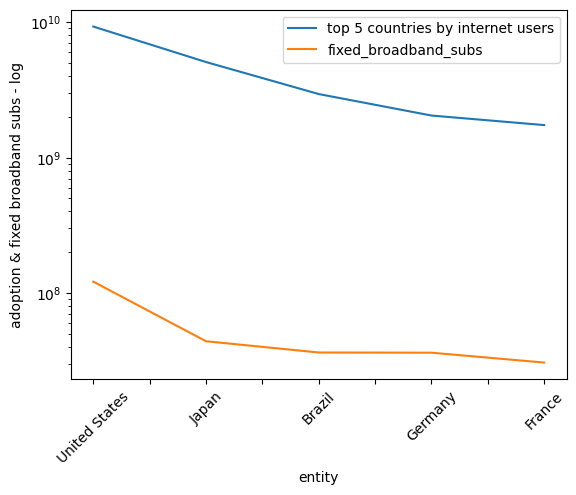

In [38]:
import matplotlib_inline
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot 'top_5_users' data
top_5_users.plot(x='entity', y='sum of internet users', label='top 5 countries by internet users', ax=ax,logy=True)

# Plot 'adoption_2020_by_country' data and set the ylabel
adoption_2020_by_country.plot(x='entity', y='fixed_broadband_subs', ax=ax, ylabel='adoption & fixed broadband subs - log',logy=True)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

#There exists a strong positive correlation between the adoption of fixed broadband services across different countries and the number of fixed broadband subscribers within those countries. This noteworthy correlation suggests that as countries invest in and expand their fixed broadband infrastructure, there is a corresponding increase in the number of individuals and households subscribing to these services.

#This positive correlation underscores the significance of infrastructure development and accessibility in fostering higher broadband adoption rates. It implies that countries with robust broadband infrastructure tend to experience greater adoption by their populations, indicating a growing reliance on fixed broadband for various aspects of daily life, such as education, business, and communication.